# Regresión Lineal

Importar librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error as rmse

import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (15, 7)})
%matplotlib inline 

pd.options.display.float_format = '{:,.2f}'.format

Cargar CSV

In [3]:
df = pd.read_csv("datasets/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Análsisisis exploratorio de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,"2,013.63",4.66,7.63,"36,947.21",0.04
std,2.89,5.08,8.64,"38,886.88",0.25
min,"2,003.00",0.10,0.32,500.00,0.00
25%,"2,012.00",0.90,1.20,"15,000.00",0.00
50%,"2,014.00",3.60,6.40,"32,000.00",0.00
75%,"2,016.00",6.00,9.90,"48,767.00",0.00
max,"2,018.00",35.00,92.60,"500,000.00",3.00


* No hay datos faltantes

## Conteos por variables

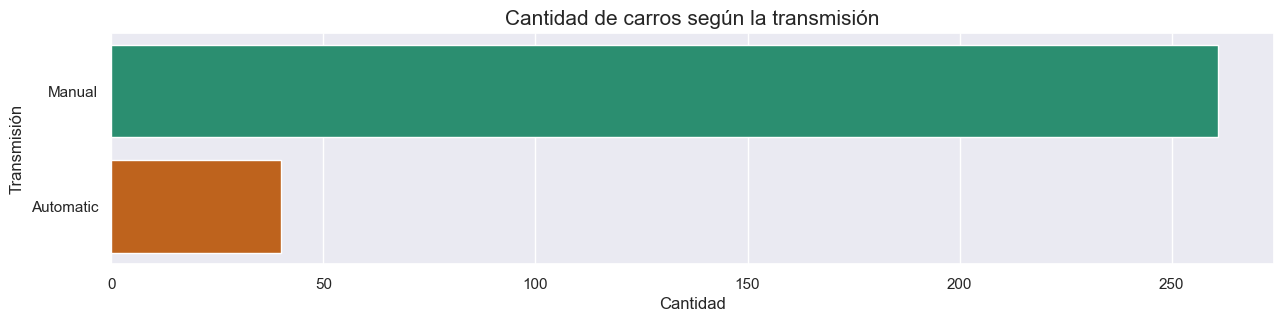

In [6]:
plt.figure(figsize = (15, 3))
sns.countplot(y = df['Transmission'], order=df['Transmission'].value_counts().index, palette = 'Dark2')
plt.title("Cantidad de carros según la transmisión", fontsize = 15)
plt.xlabel("Cantidad")
plt.ylabel("Transmisión")
plt.show()

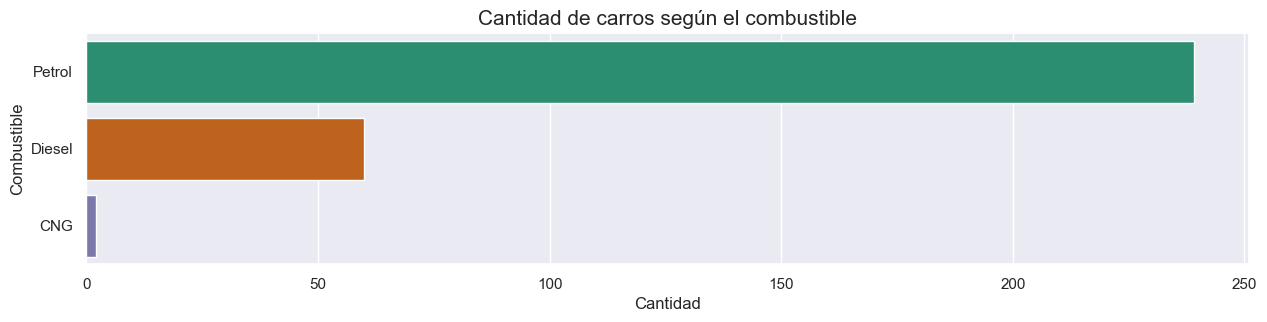

In [7]:
plt.figure(figsize = (15, 3))
sns.countplot(y = df['Fuel_Type'], order=df['Fuel_Type'].value_counts().index, palette = 'Dark2')
plt.title("Cantidad de carros según el combustible", fontsize = 15)
plt.xlabel("Cantidad")
plt.ylabel("Combustible")
plt.show()

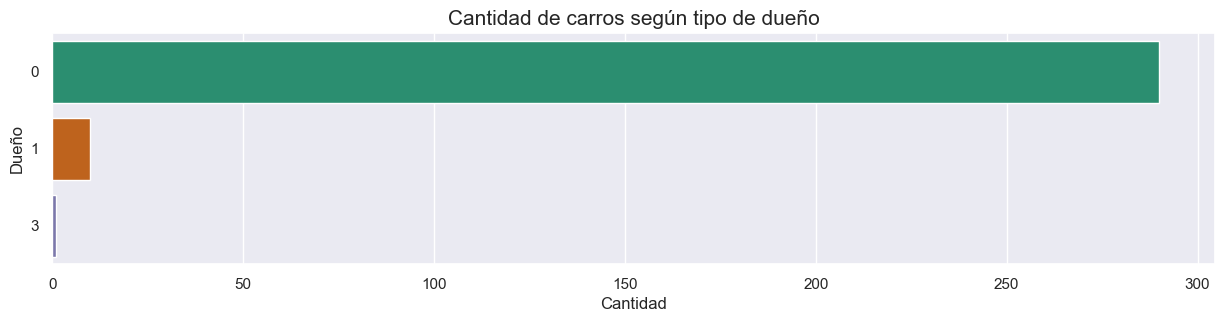

In [8]:
plt.figure(figsize = (15, 3))
sns.countplot(y = df['Owner'], order=df['Owner'].value_counts().index, palette = 'Dark2')
plt.title("Cantidad de carros según tipo de dueño", fontsize = 15)
plt.xlabel("Cantidad")
plt.ylabel("Dueño")
plt.show()

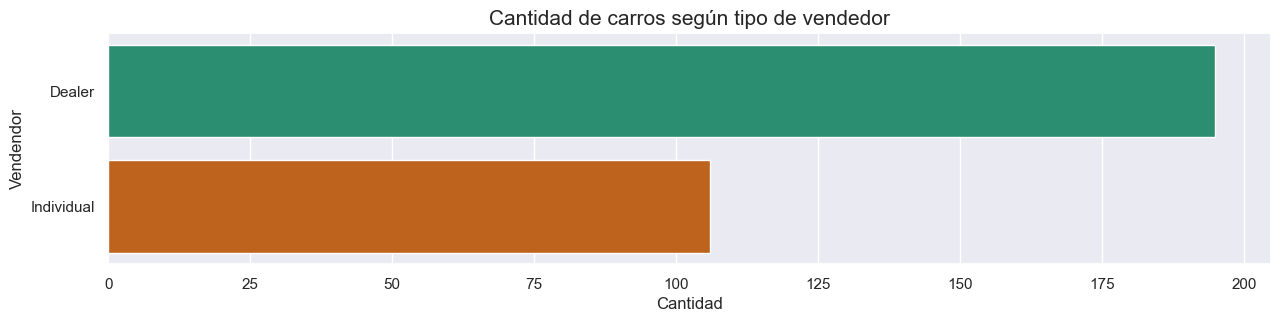

In [9]:
plt.figure(figsize = (15, 3))
sns.countplot(y = df['Seller_Type'], order=df['Seller_Type'].value_counts().index, palette = 'Dark2')
plt.title("Cantidad de carros según tipo de vendedor", fontsize = 15)
plt.xlabel("Cantidad")
plt.ylabel("Vendendor")
plt.show()

Text(0, 0.5, 'Año')

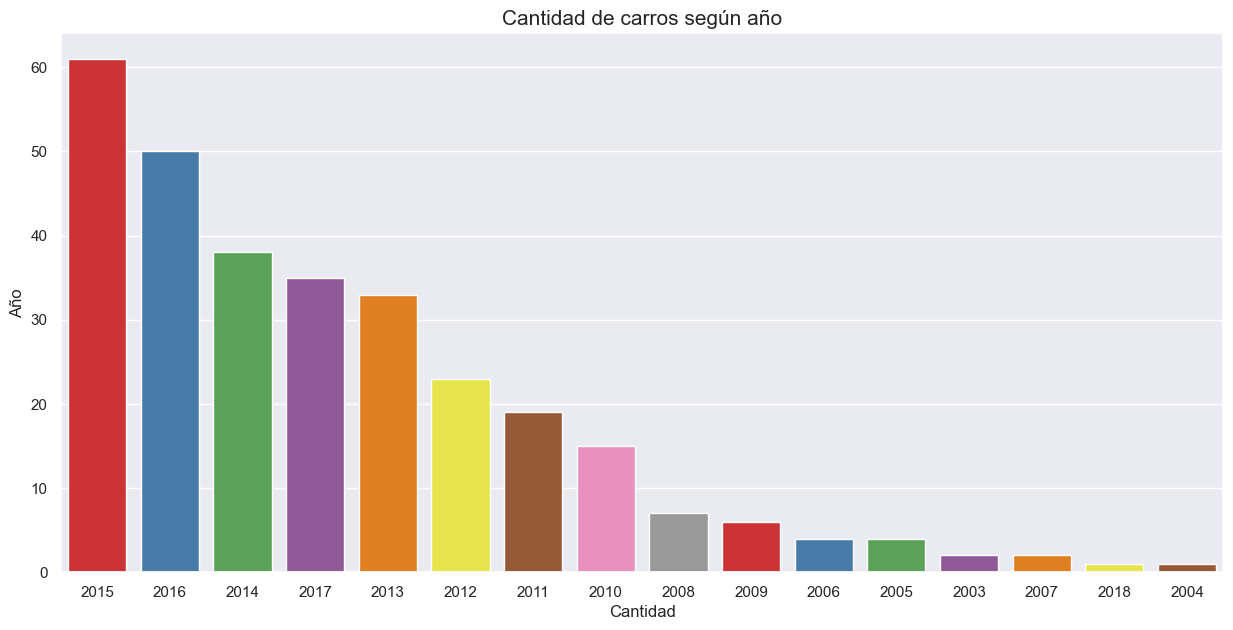

In [10]:
plt.figure(figsize = (15, 7))
sns.countplot(x = 'Year', order=df['Year'].value_counts().index, data = df, palette = 'Set1')
plt.title("Cantidad de carros según año", fontsize = 15)
plt.xlabel("Cantidad")
plt.ylabel("Año")

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
df.groupby('Car_Name')[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']].agg(['count', 'min', 'max', 'mean']).sample(15)

Year                      Selling_Price              \
                       count   min   max     mean         count   min   max   
Car_Name                                                                      
Yamaha Fazer               1  2014  2014 2,014.00             1  0.50  0.50   
Yamaha FZ S V 2.0          3  2015  2017 2,015.67             3  0.48  0.78   
elantra                    2  2015  2015 2,015.00             2 11.45 11.75   
Suzuki Access 125          1  2008  2008 2,008.00             1  0.25  0.25   
Hero Passion X pro         1  2016  2016 2,016.00             1  0.50  0.50   
KTM RC200                  2  2016  2017 2,016.50             2  1.20  1.65   
innova                     9  2005  2017 2,012.33             9  2.75 23.00   
Hero  Ignitor Disc         1  2013  2013 2,013.00             1  0.20  0.20   
omni                       1  2012  2012 2,012.00             1  1.25  1.25   
Hero Honda CBZ extreme     1  2011  2011 2,011.00             1  0.38  0.38   
KTM RC390                  1  2015  2015 2,015.00             1  1.35  1.35   
camry                      1  2006  2006 2,006.00             1  2.50  2.50   
TVS Apache RTR 160         3  2012  2017 2,014.33             3  0.42  0.65   
i10                        5  2011  2013 2,011.60             5  2.55  4.00   
Hero Extreme               2  2013  2014 2,013.50             2  0.55  0.65   

                             Present_Price                   Kms_Driven  \
                        mean         count   min   max  mean      count   
Car_Name                                                                  
Yamaha Fazer            0.50             1  0.88  0.88  0.88          1   
Yamaha FZ S V 2.0       0.60             3  0.84  0.84  0.84          3   
elantra                11.60             2 14.79 14.79 14.79          2   
Suzuki Access 125       0.25             1  0.58  0.58  0.58          1   
Hero Passion X pro      0.50             1  0.55  0.55  0.55          1   
KTM RC200               1.42             2  1.78  1.78  1.78          2   
innova                 12.78             9 10.21 25.39 17.85          9   
Hero  Ignitor Disc      0.20             1  0.65  0.65  0.65          1   
omni                    1.25             1  2.69  2.69  2.69          1   
Hero Honda CBZ extreme  0.38             1  0.79  0.79  0.79          1   
KTM RC390               1.35             1  2.37  2.37  2.37          1   
camry                   2.50             1 23.73 23.73 23.73          1   
TVS Apache RTR 160      0.56             3  0.81  0.81  0.81          3   
i10                     3.06             5  4.43  4.60  4.57          5   
Hero Extreme            0.60             2  0.79  0.79  0.79          2   

                                                   
                           min     max       mean  
Car_Name                                           
Yamaha Fazer              8000    8000   8,000.00  
Yamaha FZ S V 2.0         5000   58000  28,666.67  
elantra                  12900   43535  28,217.50  
Suzuki Access 125         1900    1900   1,900.00  
Hero Passion X pro       31000   31000  31,000.00  
KTM RC200                 4000    6000   5,000.00  
innova                   11000  197176  58,713.11  
Hero  Ignitor Disc       24000   24000  24,000.00  
omni                     50000   50000  50,000.00  
Hero Honda CBZ extreme   75000   75000  75,000.00  
KTM RC390                21700   21700  21,700.00  
camry                   142000  142000 142,000.00  
TVS Apache RTR 160       11800   42000  24,266.67  
i10                      22517   57000  39,750.40  
Hero Extreme             15000   16000  15,500.00

## Valores promedios

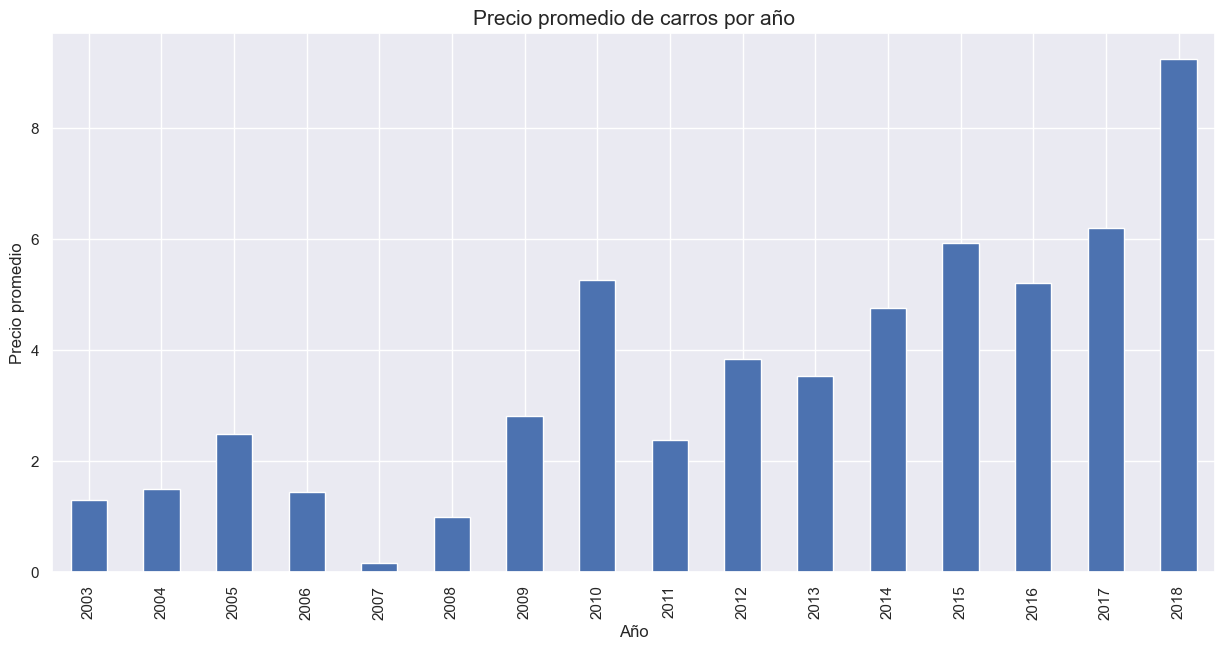

In [13]:
plt.figure(figsize = (15, 7))
df.groupby('Year')['Selling_Price'].mean().plot(kind = 'bar', color = 'b')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title("Precio promedio de carros por año", fontsize = 15)
plt.xlabel("Año")
plt.ylabel("Precio promedio")
plt.show()

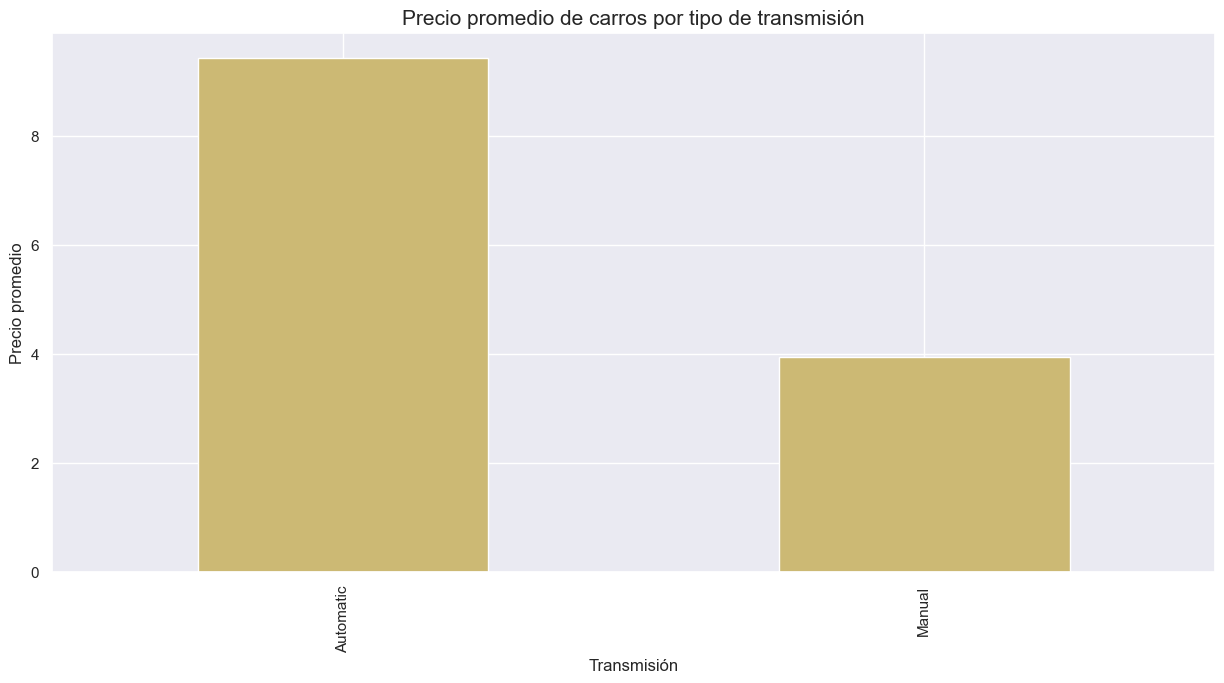

In [14]:
plt.figure(figsize = (15, 7))
df.groupby('Transmission')['Selling_Price'].mean().plot(kind = 'bar', color = 'y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title("Precio promedio de carros por tipo de transmisión", fontsize = 15)
plt.xlabel("Transmisión")
plt.ylabel("Precio promedio")
plt.show()

## Interpretaciones

Vamos a validar la hipótesis de que entre más kilómetros de recorrido tiene el carro, menor será su valor

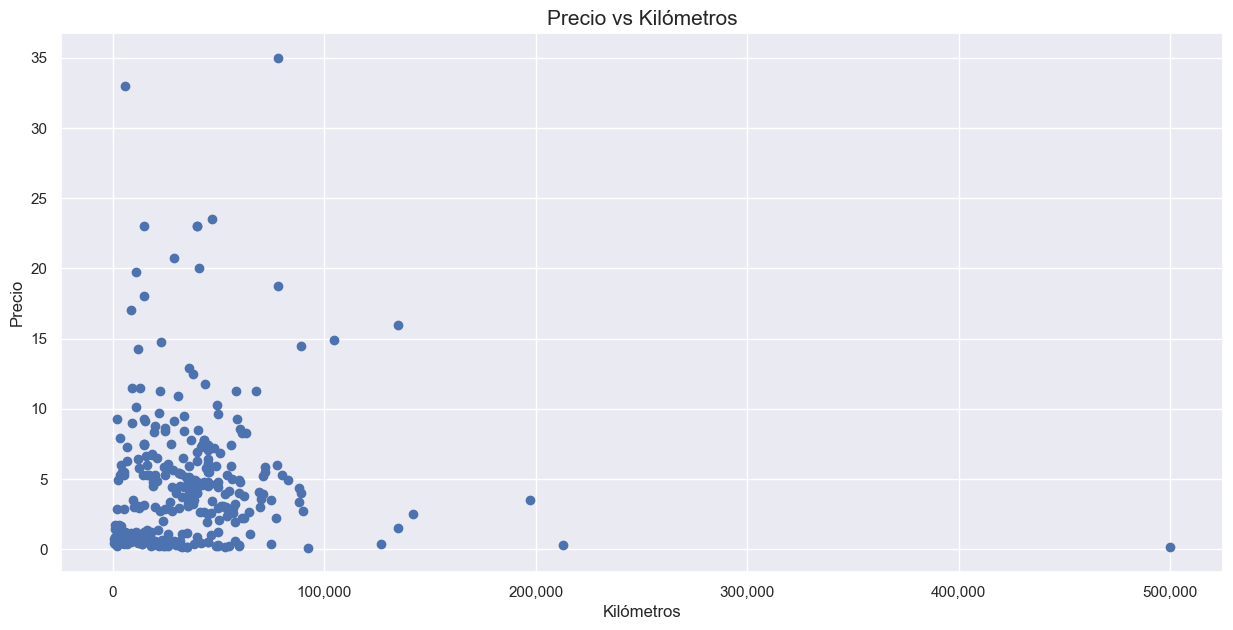

In [15]:
plt.figure(figsize = (15, 7))
plt.scatter(df['Kms_Driven'], df['Selling_Price'])
current_values_x = plt.gca().get_xticks()
current_values_y = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values_y])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])
plt.title("Precio vs Kilómetros", fontsize = 15)
plt.xlabel("Kilómetros")
plt.ylabel("Precio")
plt.show()

Ahora validamos si entre más antiguo el carro menor es su valor

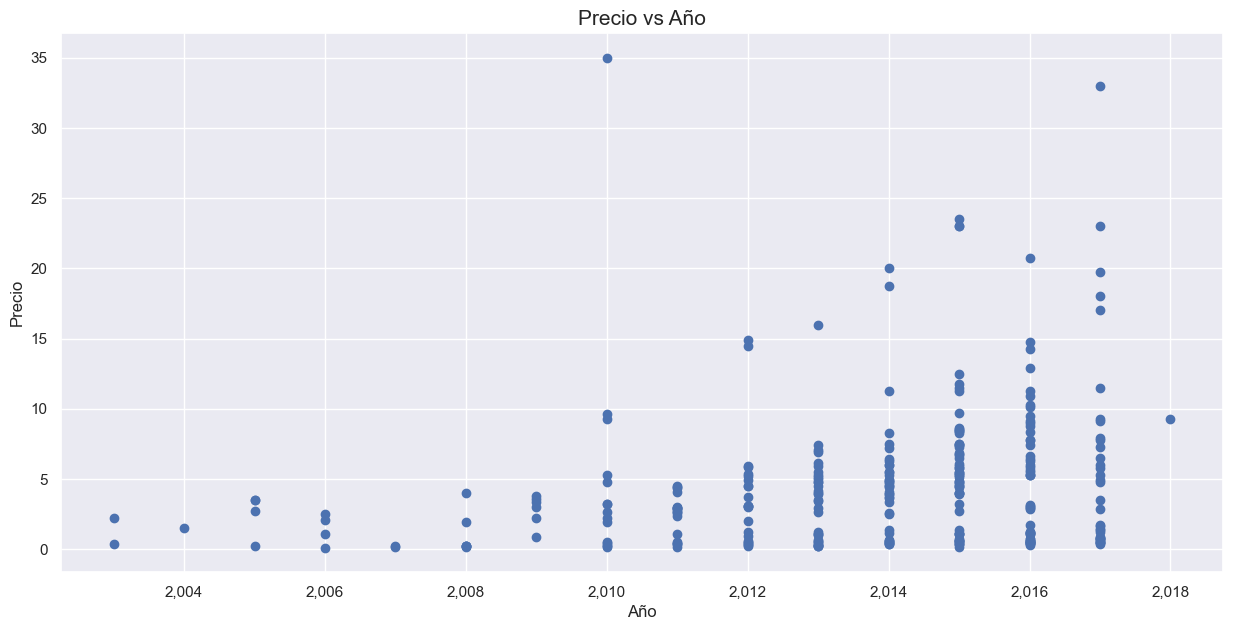

In [16]:
plt.figure(figsize = (15, 7))
plt.scatter(df['Year'], df['Selling_Price'])
current_values_x = plt.gca().get_xticks()
current_values_y = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values_y])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])
plt.title("Precio vs Año", fontsize = 15)
plt.xlabel("Año")
plt.ylabel("Precio")
plt.show()

Validamos si un precio de actual implica un precio de venta alto

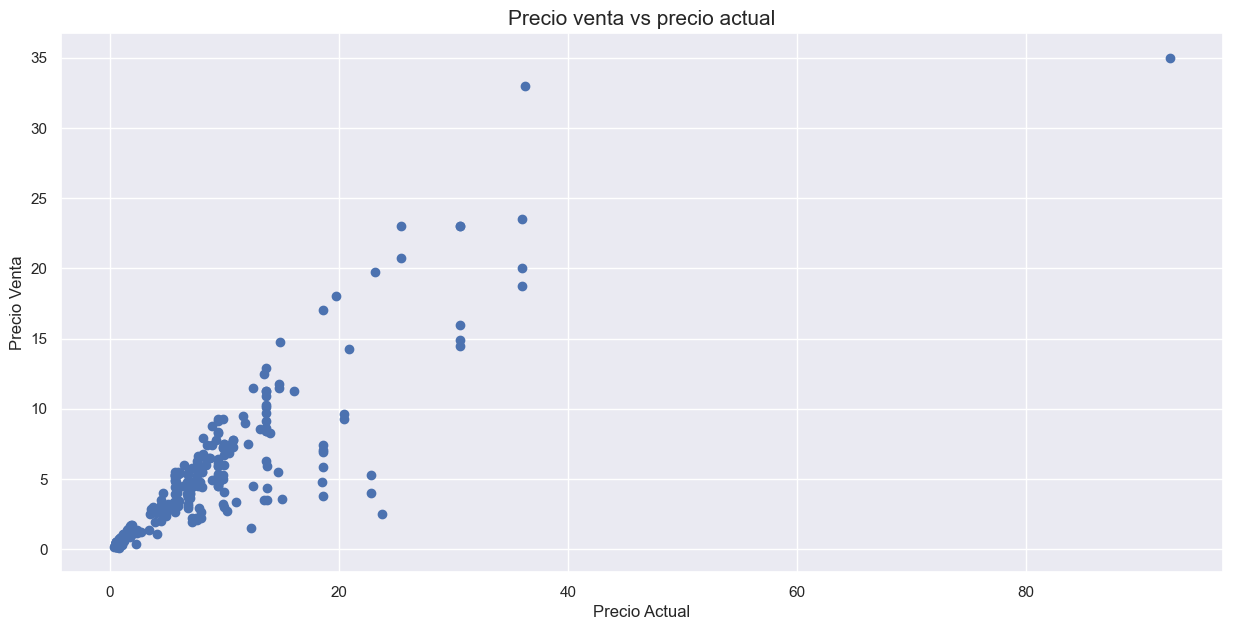

In [17]:
plt.figure(figsize = (15, 7))
plt.scatter(df['Present_Price'], df['Selling_Price'])
current_values_x = plt.gca().get_xticks()
current_values_y = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values_y])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])
plt.title("Precio venta vs precio actual", fontsize = 15)
plt.xlabel("Precio Actual")
plt.ylabel("Precio Venta")
plt.show()

## Correlaciones

In [18]:
corr_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']]
corr_df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven
Year,1.00,0.24,-0.05,-0.52
Selling_Price,0.24,1.00,0.88,0.03
Present_Price,-0.05,0.88,1.00,0.20
Kms_Driven,-0.52,0.03,0.20,1.00


Text(0.5, 1.0, 'Correlation Matrix')

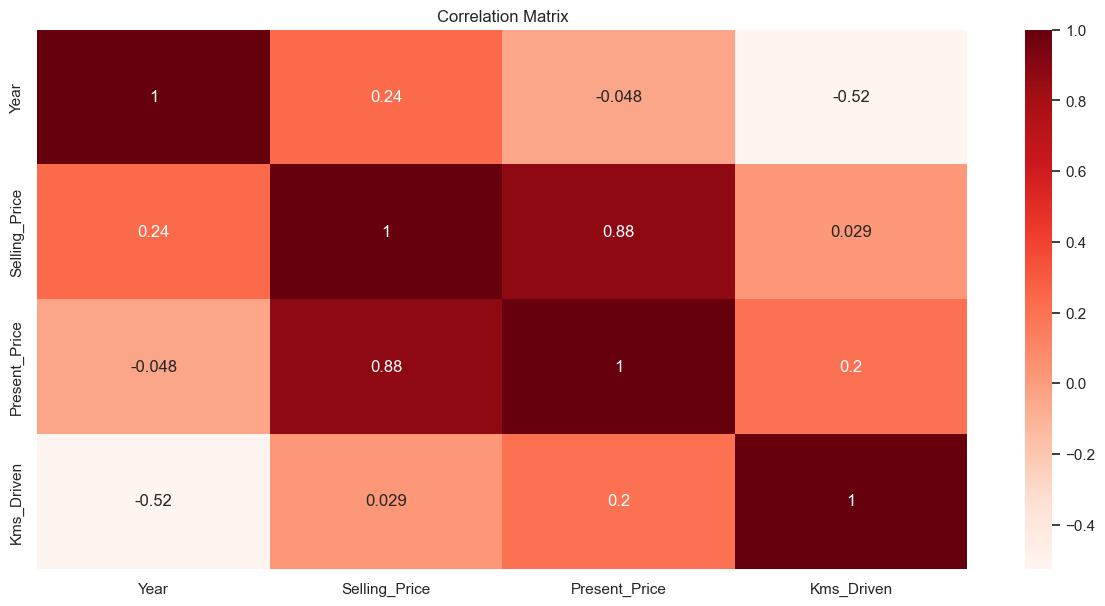

In [19]:
plt.figure(figsize = (15, 7))
sns.heatmap(corr_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## Modelo

Vamos a usar sólo la variable de precio actual, ya que es la que mejor se correlaciona con el precio a de venta que queremos predecir

In [20]:
fig = px.scatter(df,
                 x='Present_Price',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Precio actual vs. Precio venta')
fig.update_traces(marker_size=5)
fig.show()

Objetivo:
* y = a * x + b
* Selling_Price = a * Present_Price + b

In [21]:
def estimar_precio_venta(precio_actual, a, b):
    return a * precio_actual + b

In [22]:
a = 4
b = 50
estimar_precio_venta(12.5,a,b)

100.0

In [23]:
precio_actual = df.Present_Price
precio_actual

0      5.59
1      9.54
2      9.85
3      4.15
4      6.87
       ... 
296   11.60
297    5.90
298   11.00
299   12.50
300    5.90
Name: Present_Price, Length: 301, dtype: float64

In [24]:
precios_calculados = estimar_precio_venta(precio_actual, a, b)
precios_calculados

0      72.36
1      88.16
2      89.40
3      66.60
4      77.48
       ...  
296    96.40
297    73.60
298    94.00
299   100.00
300    73.60
Name: Present_Price, Length: 301, dtype: float64

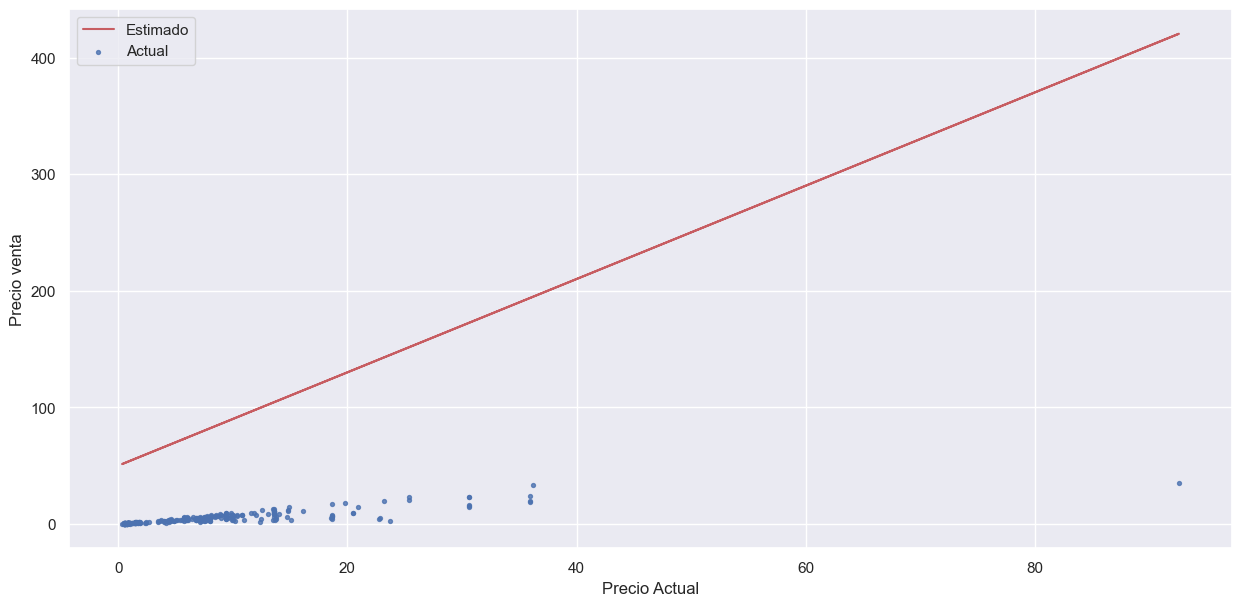

In [25]:
plt.figure(figsize = (15, 7))
plt.plot(precio_actual, precios_calculados, 'r', alpha=0.9);
target = df.Selling_Price
plt.scatter(precio_actual, target, s=8,alpha=0.8);
plt.xlabel('Precio Actual')
plt.ylabel('Precio venta')
plt.legend(['Estimado', 'Actual'])

## Optimizando el modelo

Train y Test

In [26]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=2323)
print(df_train.shape)
print(df_test.shape)

(240, 9)
(61, 9)


In [27]:
model = LinearRegression()

y_train = df_train[['Present_Price']]
X_train = df_train.Selling_Price
model.fit(y_train,X_train)

LinearRegression()

In [28]:
predictions = model.predict(y_train)
predictions

array([ 0.77911294,  4.59907148, 20.87964324,  3.51255633,  0.81342395,
       17.82024532,  1.156534  ,  1.1736895 ,  0.64186893,  4.18162092,
        0.63043192,  5.69130513,  0.61327642,  1.23087451,  0.85345346,
        4.24452443,  0.60755792, 14.8351879 ,  2.37457467,  2.57472219,
        5.29101007,  0.73908344,  5.69130513,  1.156534  ,  8.09307546,
       10.95804436,  0.85917196,  2.68909221, 10.95804436,  8.83076207,
        0.68189843,  5.69130513,  4.20449492, 20.87964324,  4.43895345,
        8.77357706,  3.68982985,  4.39320545,  8.09307546, 17.82024532,
        4.20449492,  4.94790003,  4.89643352,  8.09307546,  0.63043192,
       14.8351879 ,  0.81342395,  0.74480194,  7.06374532,  5.11945505,
        4.39320545, 17.82024532,  8.09307546,  0.74480194,  6.48617674,
        7.80143192,  0.88204596, 17.82024532,  0.60755792,  0.85917196,
        0.79626845,  0.74480194,  8.09307546,  5.69130513,  5.23954357,
       10.91801486,  3.11226127,  0.78483145,  4.40464245,  4.18

In [29]:
rmse(y_train, predictions)

np.float64(18.2695759827377)

Tenemos un error cuadrado de 18 dólares aproximadamente

In [30]:
print(model.coef_) # outputs [0.51684903]

print(model.intercept_)

[0.57185008]
0.3159143803714688


In [31]:
a = model.coef_[0]
b = model.intercept_
precio_actual_train = df_train.Present_Price
precio_venta_estimado = estimar_precio_venta(precio_actual_train, a, b)
precio_venta_estimado

134    0.78
32     4.60
59    20.88
0      3.51
138    0.81
       ... 
11     6.25
90    10.96
147    0.80
232    8.77
72    10.96
Name: Present_Price, Length: 240, dtype: float64

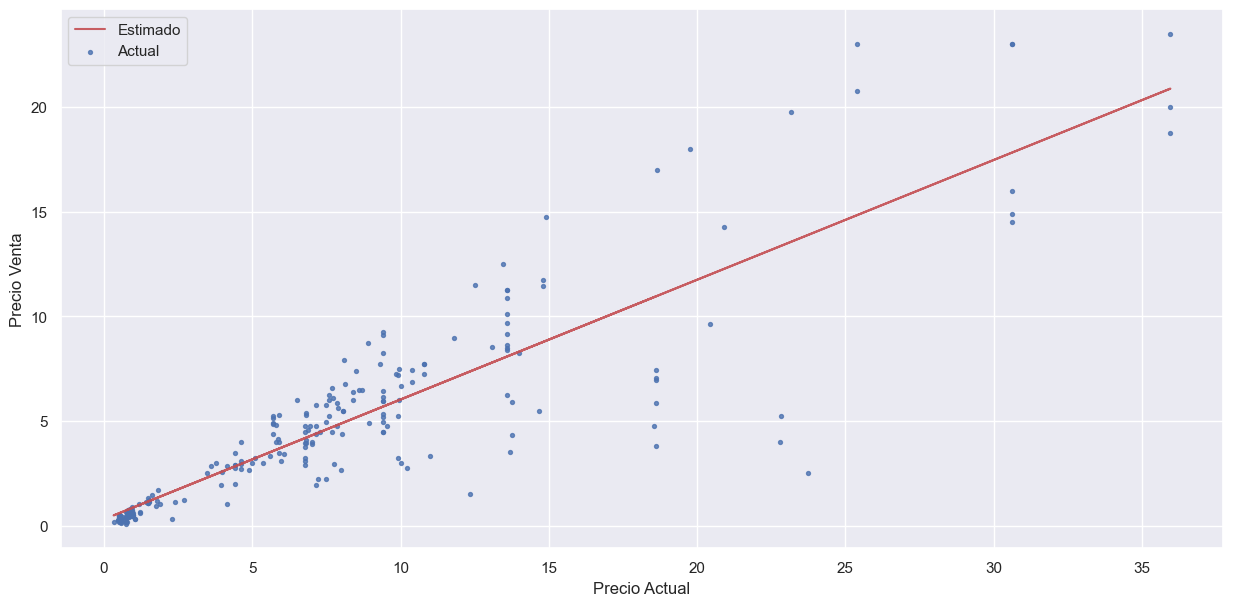

In [32]:
plt.plot(precio_actual_train, precio_venta_estimado, 'r', alpha=0.9)
target = df_train.Selling_Price
plt.scatter(precio_actual_train, target, s=8,alpha=0.8)
plt.xlabel('Precio Actual')
plt.ylabel('Precio Venta')
plt.legend(['Estimado', 'Actual'])

## Predecir en test

In [35]:
y_test = df_test[['Present_Price']]
X_test = df_test.Selling_Price

model.fit(y_test,X_test)

predictions = model.predict(y_test)
rmse(y_test, predictions)

np.float64(58.85118975991962)

In [36]:
a = model.coef_[0]
b = model.intercept_
precio_actual_test = df_test.Present_Price
precio_venta_estimado_test = estimar_precio_venta(precio_actual_test, a, b)

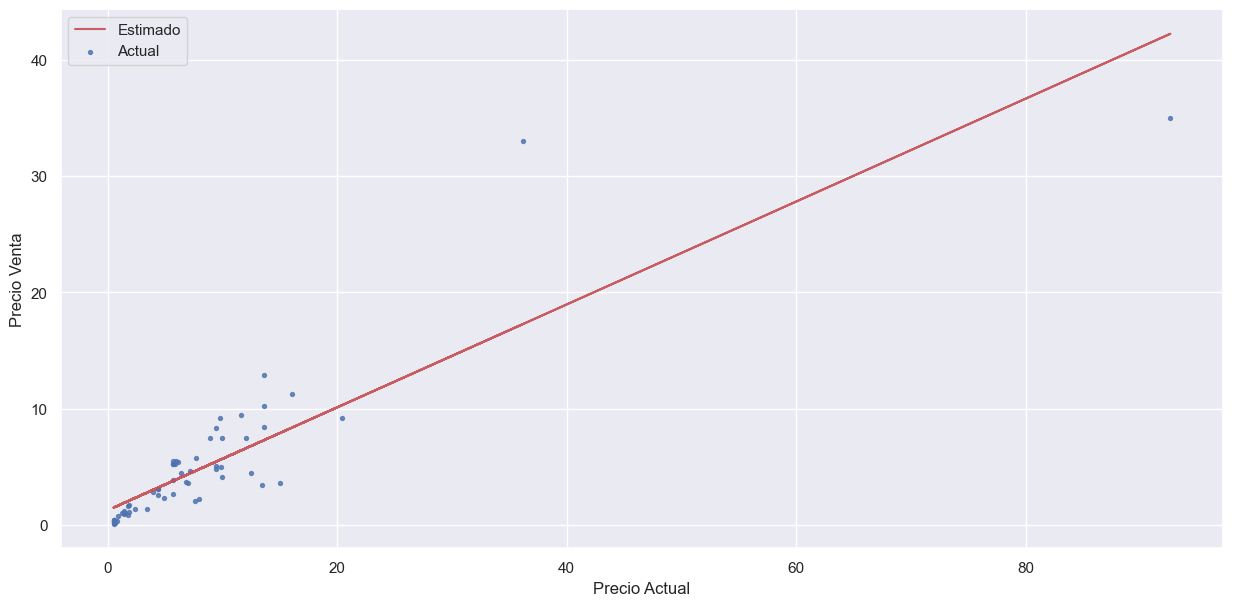

In [37]:
plt.plot(precio_actual_test, precio_venta_estimado_test, 'r', alpha=0.9)
target = df_test.Selling_Price
plt.scatter(precio_actual_test, target, s=8,alpha=0.8)
plt.xlabel('Precio Actual')
plt.ylabel('Precio Venta')
plt.legend(['Estimado', 'Actual'])